Using Customer Behavior Data to Improve Customer Retention
https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/


Import some libraries for analysis and visualization

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Getting familiar with the data set

In [252]:
dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv") 
# Upload dataset

In [253]:
dataframe.shape
# Number of rows & columns

(7043, 21)

In [254]:
dataframe.head() 
# Prints the head of the original data to see what it looks like

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [255]:
dataframe["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [256]:
dataframe["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [257]:
dataframe.head() 
# Prints the head of the original data to see what it looks like

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [258]:
dataframe.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [259]:
print(dataframe.describe()) 
# Get statistical summary of the numerical variables

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [260]:
dataframe.isnull().sum()
# Check for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Understanding who are our customers

In [261]:
customer_df = dataframe[['gender', 'SeniorCitizen','Churn', 'Contract','PaperlessBilling'  ,'PaymentMethod', 'MonthlyCharges']]
customer_df.head()

,gender,SeniorCitizen,Churn,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,One year,No,Mailed check,56.95
2,Male,0,Yes,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,Yes,Month-to-month,Yes,Electronic check,70.70


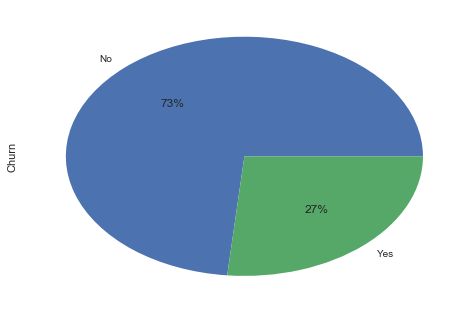

In [274]:
customer_df['Churn'].value_counts().plot.pie(autopct  = "%1.0f%%")                                                      
plt.show()

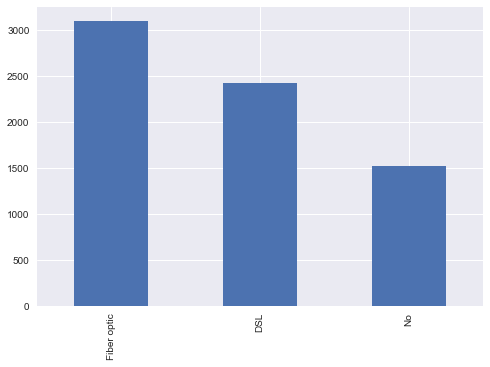

In [263]:
dataframe["InternetService"].value_counts().plot(kind='bar')
                                                      
plt.show()

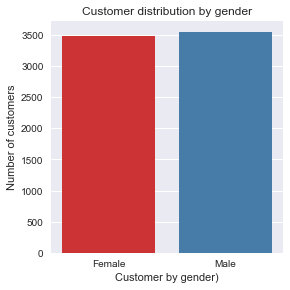

In [264]:
# Customer distribution by gender
sns.factorplot(x="gender",data= dataframe,kind="count", palette="Set1")
plt.ylabel("Number of customers")
plt.xlabel("Customer by gender)")
plt.title("Customer distribution by gender")
plt.show()

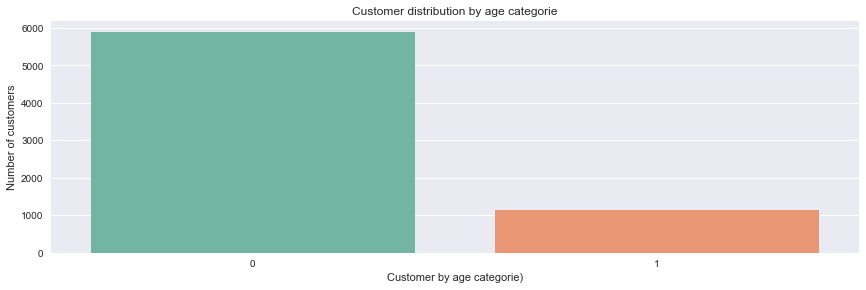

In [265]:
# Customer distribution by age categorie
sns.factorplot(x="SeniorCitizen",data= dataframe,kind="count", palette="Set2", aspect = 3)
plt.ylabel("Number of customers")
plt.xlabel("Customer by age categorie)")
plt.title("Customer distribution by age categorie")
plt.show()

In [266]:
dataframe["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

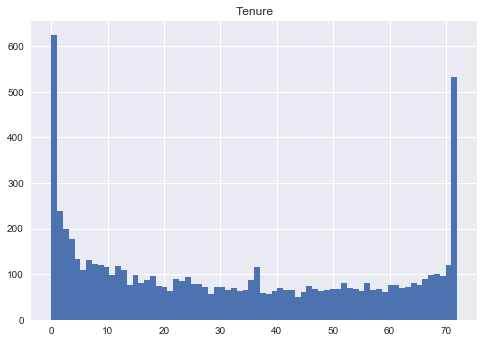

In [267]:
dataframe['tenure'].hist(bins=70)
plt.title("Tenure")
plt.show()

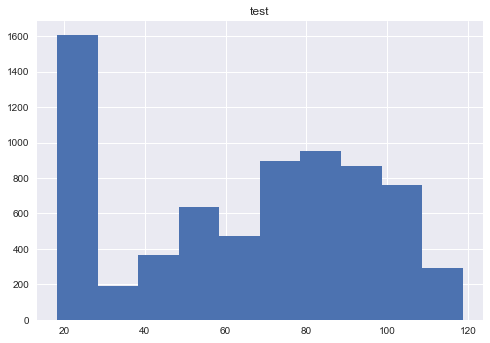

In [268]:
dataframe['MonthlyCharges'].hist()
plt.title("test")
plt.show()

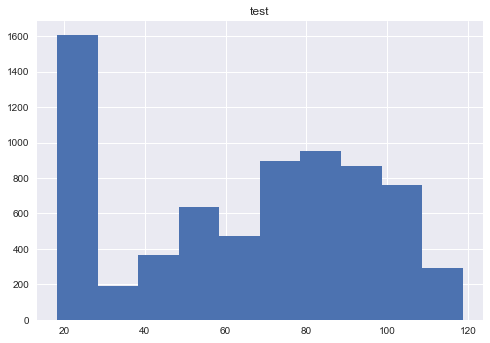

In [269]:
dataframe['MonthlyCharges'].hist()
plt.title("test")
plt.show()

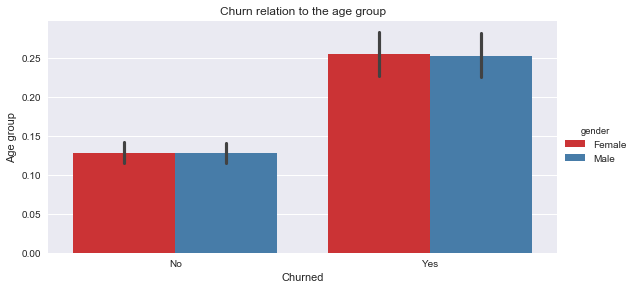

In [270]:
sns.factorplot(x="Churn",data= dataframe,y="SeniorCitizen", kind="bar", hue = "gender",
               aspect=2, palette="Set1")
"""
Churn vs Age Group 
"""  
plt.ylabel("Age group")
plt.xlabel("Churned")
plt.title("Churn relation to the age group")
plt.show()

In [271]:
dataframe = dataframe.replace(to_replace=['No', 'Yes', 'No internet service', 'No phone service'], value=[0, 1, 0, 0])
dataframe = dataframe.replace(to_replace=['Month-to-month', 'One year', 'Two year'], value=[1, 12, 24])
dataframe.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,1,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,12,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,1,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,12,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,1,1,Electronic check,70.70,151.65,1


In [272]:
dataframe.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,1,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,12,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,1,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,12,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,1,1,Electronic check,70.70,151.65,1


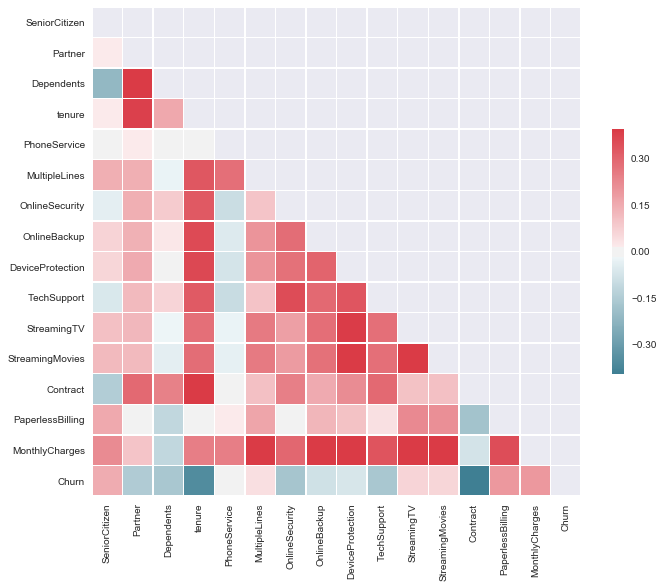

In [273]:
corr = dataframe.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()